In [1]:
# Загружаем наш датасет и необходимые для работы библиотеки. Данный датасет представляет из себя набор переменных для таких значений как State, R&D Spend, Marketing Spend, Administration, Profit. На выходе имеем 49 значений на 5 переменных.

In [2]:
# Устанавливаем все необходимые библиотеки для начала работы.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Загружаем наш датасет без учета первой колонки State.
mk = pd.read_csv('cherkasov_startups.csv', sep=',')
mk = mk.drop(['State'], axis=1)

In [4]:
mk

,R&DSpend,MarketingSpend,Administration,Profit
0,165349.20,471784.10,136897.80,192261.83
1,162597.70,443898.53,151377.59,191792.06
2,153441.51,407934.54,101145.55,191050.39
3,144372.41,383199.62,118671.85,182901.99
4,142107.34,366168.42,91391.77,166187.94
5,131876.90,362861.36,99814.71,156991.12
6,134615.46,127716.82,147198.87,156122.51
7,130298.13,323876.68,145530.06,155752.60
8,120542.52,311613.29,148718.95,152211.77
9,123334.88,304981.62,108679.17,149759.96


In [5]:
# Смотрим статистику нашего датасета
mk.describe()

,R&DSpend,MarketingSpend,Administration,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,211025.097800,121344.639600,112012.639200
std,45902.256482,122290.310726,28017.802755,40306.180338
min,0.000000,0.000000,51283.140000,14681.400000
25%,39936.370000,129300.132500,103730.875000,90138.902500
50%,73051.080000,212716.240000,122699.795000,107978.190000
75%,101602.800000,299469.085000,144842.180000,139765.977500
max,165349.200000,471784.100000,182645.560000,192261.830000


In [6]:
# Проверяем наш дата сет на наличие выбросов и избавляемся от них.
def outliers(mk):
    num_var = list(mk._get_numeric_data().columns)
    for col_names in num_var:
        mk[col_names] = mk[col_names].apply(lambda y: mk[col_names].mean()-3*mk[col_names].std() 
                            if y < mk[col_names].mean()-3*mk[col_names].std() else y)
        mk[col_names] = mk[col_names].apply(lambda y: mk[col_names].mean()+3*mk[col_names].std() 
                            if y > mk[col_names].mean()+3*mk[col_names].std() else y)
    return(mk)

In [7]:
# Повторно смотрим на статистику датасета. Как итог, после преобразований ничего не изменилось, что означает, что выбросов не было
mk = outliers(mk)
mk.describe()

,R&DSpend,MarketingSpend,Administration,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,211025.097800,121344.639600,112012.639200
std,45902.256482,122290.310726,28017.802755,40306.180338
min,0.000000,0.000000,51283.140000,14681.400000
25%,39936.370000,129300.132500,103730.875000,90138.902500
50%,73051.080000,212716.240000,122699.795000,107978.190000
75%,101602.800000,299469.085000,144842.180000,139765.977500
max,165349.200000,471784.100000,182645.560000,192261.830000


In [8]:
mk

,R&DSpend,MarketingSpend,Administration,Profit
0,165349.20,471784.10,136897.80,192261.83
1,162597.70,443898.53,151377.59,191792.06
2,153441.51,407934.54,101145.55,191050.39
3,144372.41,383199.62,118671.85,182901.99
4,142107.34,366168.42,91391.77,166187.94
5,131876.90,362861.36,99814.71,156991.12
6,134615.46,127716.82,147198.87,156122.51
7,130298.13,323876.68,145530.06,155752.60
8,120542.52,311613.29,148718.95,152211.77
9,123334.88,304981.62,108679.17,149759.96


In [9]:
# Строим корреляционную матрциу. Наиболее коррелируемым фактором является R&D Spend.
mk.corr ()

,R&DSpend,MarketingSpend,Administration,Profit
R&DSpend,1.000000,0.724248,0.241955,0.972900
MarketingSpend,0.724248,1.000000,-0.032154,0.747766
Administration,0.241955,-0.032154,1.000000,0.200717
Profit,0.972900,0.747766,0.200717,1.000000


In [10]:
# Делим наш дата сет на обучающую и тестовую выборку
X = mk.iloc[:, :-1].values
y = mk.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [11]:
# Строим простую линейную регрессию зависимости от одного фактора (R&D Spend)
from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[:, 0:1], y_train)

In [12]:
# Оцениваем полученные параметры
sr.coef_, sr.intercept_

(array([0.84881531]), 49476.91928712182)

In [13]:
# Делаем прогноз 
y_pred = sr.predict(X_test[:, 0:1])

In [14]:
# Проверяем кэф. детерминации, который равен 0.93 для обучающей и 0.98 для тестовой , что является большим коэфициентом доверия.
sr.score(X_train[:, 0:1], y_train), sr.score(X_test[:, 0:1], y_test)

(0.935350096297381, 0.9838806265684715)

In [15]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка больше, чем для тестовой.
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, sr.predict(X_train[:, 0:1])), mean_squared_error(y_test, y_pred)

(99169780.04249054, 29243263.17924025)

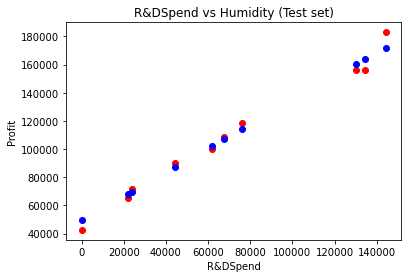

In [16]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что простая линейная регрессия описывает модель достаточно точно, однако не полностью.
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], sr.predict(X_test[:, 0:1]), 'bo')
plt.title('R&DSpend vs Humidity (Test set)')
plt.xlabel('R&DSpend')
plt.ylabel('Profit')
plt.show()

In [17]:
# Множественная регрессия. Проверяем P value - делаем выводы , что значимая переменная только Х1, но для построения будем использовать еще переменную Х2.
import statsmodels.api as sm
X = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X).fit()
#mr1.pvalues
mr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 12 Jan 2021   Prob (F-statistic):           7.86e-22
Time:                        20:06:51   Log-Likelihood:                -424.06
No. Observations:                  40   AIC:                             856.1
Df Residuals:                      36   BIC:                             862.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.966e+04   8096.777      6.133      0.000    3.32e+04    6.61e+04
x1             0.8034      0.057     14.196      0.000       0.689       0.918
x2             0.0245      0.021      1.191      0.241      -0.017       0.066
x3            -0.0171      0.063     -0.272      0.787      -0.144       0.110
==============================================================================
Omnibus:                       11.617   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.625
Skew:                          -0.960   Prob(JB):                      0.00181
Kurtosis:                       4.972   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Определяем значимые переменные с погрешностью 5%.
def backwardElimination(x, sl):
    x = sm.add_constant(x)
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

import statsmodels.api as sm         
SL = 0.05
X_opt = X_train
y = y_train
X_Modeled = backwardElimination(X_opt, SL)

In [19]:
X_train = X_train[:, [0,1]]
X_test = X_test[:, [0,1]]

In [20]:
# Строим множественную регрессию на обучающейся выборке.
mr = LinearRegression().fit(X_train, y_train)

In [21]:
# Получаем и оцениваем параметры.
mr.coef_, mr.intercept_

(array([0.79827194, 0.02581271]), 47662.77046436914)

In [22]:
# Строим прогноз.
y_pred = mr.predict(X_test)

In [23]:
# Проверяем кэф. детерминации, который равен 0.93 для обучающей и 0.99 для тестоовой, лучше чем в моделе однофактороной регрессии.
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.9382176532996815, 0.9909864896179558)

In [24]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка больше, чем для тестовой. Ошибка меньше в сравнении с однофакторной регрессией.
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(94771088.30606458, 16352028.656112641)

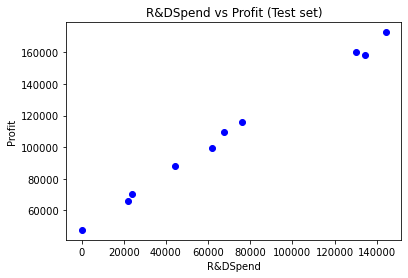

In [25]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что множественная линейная регрессия описывает модель лучше, чем однофакторная.
plt.plot(X_test[:,0], mr.predict(X_test), 'bo')
plt.title('R&DSpend vs Profit (Test set)')
plt.xlabel('R&DSpend')
plt.ylabel('Profit')
plt.show()

In [26]:
# Построим полиномиальную регрессию для нашего датасета.
from sklearn.preprocessing import PolynomialFeatures
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)
pr = LinearRegression().fit(X_train_p[:,1:], y_train)

In [27]:
# Получаем и оцениваем параметры
pr.coef_, pr.intercept_

(array([ 8.77545957e-01,  1.70747133e-02, -9.15187982e-07,  1.89681699e-07,
         4.53045985e-09]),
 46477.317564349316)

In [28]:
# Строим прогноз
y_pred = pr.predict(X_test_p[:,1:])

In [29]:
# Проверяем кэф. детерминации, который равен 0.93 для обучающей и 0.99 для тестовой. 
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:,1:], y_test)

(0.9389916143984328, 0.9906982740145991)

In [30]:
# Расчитываем среднеквадратическую ошибку. Для обучающей выборки ошибка больше, чем для тестовой.
mean_squared_error(y_train, pr.predict(X_train_p[:,1:])), mean_squared_error(y_test, y_pred)

(93583869.95725365, 16874900.3903723)

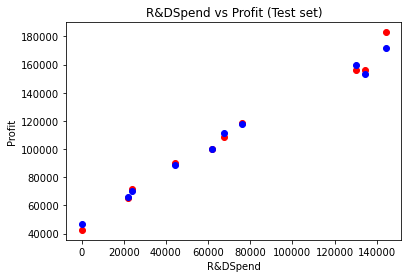

In [31]:
# Проиллюстрируем полученную модель. Можно сделать следующие выводы, что полиномиальная регрессия описывает модель не лучше чем многофакторная, точность модели как и у множественной регресии.
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], pr.predict(X_test_p[:,1:]), 'bo')
plt.title('R&DSpend vs Profit (Test set)')
plt.xlabel('R&DSpend')
plt.ylabel('Profit')
plt.show()

In [32]:
# Импортируем наши  подгтовленные данные для построения нейронной сети.
import pickle
obj = {'X_train': X_train, 'X_test': X_test,'y_train': y_train,'y_test': y_test}
output = open('kr_reg.pkl', 'wb')
pickle.dump(obj, output, 2)
output.close()

In [33]:
# Загружаем наши данные для построения нейронной сети.
import pickle
input = open('kr_reg.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [34]:
# Проводим шкалирование.
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler().fit(X_train)
X_train = sc_X.transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler().fit(np.array([[i] for i in y_train]))
y_train = sc_y.transform(np.array([[i] for i in y_train]))
y_test = sc_y.transform(np.array([[i] for i in y_test]))

In [35]:
!pip install keras
!pip install tensorflow

In [36]:
# Подключаем необходимые библиотеки.
import keras
from keras.models import Sequential
from keras.layers import Dense


In [37]:
# Создаём сеть RNN, она будет последовательной. На первом и втором слое берем тангенс для повышенной точности. Для последнего слоя используем линейную функцию активации. 
rnn = Sequential()

# Adding the input layer and the first hidden layer
rnn.add(Dense(units = 4, activation = 'tanh', input_dim = 2))

# Adding the second hidden layer
rnn.add(Dense(units = 2, activation = 'tanh'))

# Adding the output layer
rnn.add(Dense(units = 1, activation = 'linear'))

# Compiling the ANN
rnn.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

In [38]:
# Обучаем нашу нейронную сеть.
rnn.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
4/4 [==============================] - 0s 989us/step - loss: 3.9326 - accuracy: 0.0000e+00
Epoch 2/100
4/4 [==============================] - 0s 665us/step - loss: 4.4085 - accuracy: 0.0000e+00
Epoch 3/100
4/4 [==============================] - 0s 655us/step - loss: 3.5067 - accuracy: 0.0000e+00
Epoch 4/100
4/4 [==============================] - 0s 988us/step - loss: 3.1819 - accuracy: 0.0000e+00
Epoch 5/100
4/4 [==============================] - 0s 674us/step - loss: 3.2558 - accuracy: 0.0000e+00
Epoch 6/100
4/4 [==============================] - 0s 992us/step - loss: 2.8091 - accuracy: 0.0000e+00
Epoch 7/100
4/4 [==============================] - 0s 332us/step - loss: 2.8834 - accuracy: 0.0000e+00
Epoch 8/100
4/4 [==============================] - 0s 673us/step - loss: 2.6466 - accuracy: 0.0000e+00
Epoch 9/100
4/4 [==============================] - 0s 994us/step - loss: 3.0313 - accuracy: 0.0000e+00
Epoch 10/100
4/4 [==============================] - 0s 665us/step - loss:

4/4 [==============================] - 0s 658us/step - loss: 0.3577 - accuracy: 0.0000e+00
Epoch 80/100
4/4 [==============================] - 0s 998us/step - loss: 0.2040 - accuracy: 0.0000e+00
Epoch 81/100
4/4 [==============================] - 0s 665us/step - loss: 0.1890 - accuracy: 0.0000e+00
Epoch 82/100
4/4 [==============================] - 0s 665us/step - loss: 0.2035 - accuracy: 0.0000e+00
Epoch 83/100
4/4 [==============================] - 0s 665us/step - loss: 0.2953 - accuracy: 0.0000e+00
Epoch 84/100
4/4 [==============================] - 0s 665us/step - loss: 0.2179 - accuracy: 0.0000e+00
Epoch 85/100
4/4 [==============================] - 0s 665us/step - loss: 0.2567 - accuracy: 0.0000e+00
Epoch 86/100
4/4 [==============================] - 0s 665us/step - loss: 0.2207 - accuracy: 0.0000e+00
Epoch 87/100
4/4 [==============================] - 0s 666us/step - loss: 0.2304 - accuracy: 0.0000e+00
Epoch 88/100
4/4 [==============================] - 0s 657us/step - loss: 0.2

In [39]:
# Строим прогноз.
y_pred = rnn.predict(X_test)

In [40]:
# Проводим обратное шкалирование
from sklearn.preprocessing import StandardScaler
y_hat = sc_y.inverse_transform(y_pred)
y_test = sc_y.inverse_transform(y_test)
X_test = sc_X.inverse_transform(X_test)

In [41]:
# Расчитываем среднеквадратическую ошибку. 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_hat)

268659720.5335916

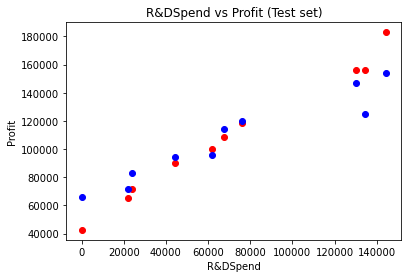

In [42]:
# Визуализируем нашу полученную модель. Как мы видим, что данная нейронная сеть не дала более точно результата для нашего датасета.
plt.scatter(X_test[:,0], y_test, color = 'red')
plt.plot(X_test[:,0], y_hat, 'bo')
plt.title('R&DSpend vs Profit (Test set)')
plt.xlabel('R&DSpend')
plt.ylabel('Profit')
plt.show()

In [43]:
# Подводя итоги данной работы следует отметить следующее. Датасет был использован в построении различных видах регресии и так же нейронной сети. Данные виды регресии смогли относительно точно описать нашу модель и подготовить наши данные для создания нейронной сети, однако построенная нейронная сеть оказалась менее точная, чем регрессионная. Общая оценка модели удовдетворительная из-за выского коэфициента детерминации и точности построения.  